# 1. Le problème

L’objectif de ce TP est de comprendre la **méthode du gradient**, une méthode permettant de trouver rapidement le **minimum d’une fonction**. Le but étant ensuite d’appliquer cette méthode pour trouver les paramètres (coefficient directeur et ordonnée à l’origine) dans le problème de régression linéaire. On réutilisera ultérieurement cette méthode sous le nom de **backpropagation** (ou rétropropagation en Français) lors de l’apprentissage pour les réseaux de neurones.

La méthode du gradient consiste à chercher la direction de plus grande pente, de faire un pas dans cette direction, puis de recommencer autant de fois que nécessaire pour arriver au minimum de la fonction.

<img src="img/201.png">

Il faut donc comprendre comment formuler mathématiquement cette idée de plus grande pente. On le fait avec le gradient, qui n’est rien d’autre que la généralisation de la notion de **dérivée** en plusieurs dimensions.

C’est pourquoi nous commençons par rappeler cette notion de dérivée.

# 2. Dérivée d’une fonction comme coefficient directeur de droite

Commençons par une définition formelle :

**Définition 1** : *La dérivée $\dfrac{df}{dx}(x_0)$ d’une fonction $f$ en un point $x_0$ est le coefficient directeur de la droite passant par le point $(x_0,f(x_0))$ approchant le mieux le graphe de $f$.* 

Qui s’illustre avec

<img src="img/202.png">

Pour comprendre cela en détail, il faut tout d’abord revoir la notion de droite passant par deux points.

## 2.1 Équation d'une droite passant par deux points

Relire le TP précédent. Nous pouvons maintenant nous concentrer sur la notion de dérivée elle-même. Vous aurez cependant à utiliser les fonctions définies dans ce TP (qui se trouvent tp1.py, importé ci-dessous)

In [1]:
def coef_dir(p,q):
    return (float(p[1] - q[1])) / float((p[0] - q[0]))

def abcisse_origine(p,q):
    a = coef_dir(p, q)
    return p[1] - a * p[0]

def param_droite(p,q):
    return "(a,b)=" + str((coef_dir(p, q), abcisse_origine(p, q)))

def dist2(p,q):
    return ((p[0] - q[0]) ** 2) + ((p[1] - q[1]) ** 2)

def tension(p,a,b):
    q = (p[0], a * p[0] + b)
    return dist2(p, q)

def action(nuage, a, b):
    action = 0
    for point in nuage:
        action += tension(point, a, b)
    return action

## 2.2 Approximation de la tangente (dérivée !) du graphe d’une fonction

Nous commençons par rappeler le code python qui permet de produire cette image : le tracé de la courbe représentative de la fonction f 

<img src="img/203.png">

Considérons la fonction f(x) = $2x^2$. Vous pouvez la tracer à l’aide des commandes suivantes. 

In [2]:
#Il faut tout d’abord importer les bibliothèques numpy et matplot
import numpy as np
import matplotlib.pyplot as plt

#puis créer les 30 valeurs que x va prendre entre -10 et +10

x = np.linspace(-10, 10, 30)

#ensuite on définit les images de ces trente valeurs à l’aide d'une fonction f
def f(x):
    return 2*(x ** 2)
    
y = f(x)

#puis l’on peut finalement créer la représentation graphique
plt.plot(x,y)

#Nous pouvons maintenant représenter deux points particuliers du graphe de f : (1,f(1)) et (3,f(3)).
plt.plot(1,f(1),'om')
plt.plot(3,f(3),'om')

#Ainsi qu’en pointillé la droite d’équation y = ax + b pour les valeurs a=2 et b=3.
def droite(a,b,x):
    return(a*x+b)
plt.plot(x,droite(2,3,x),'--r')

On aurait pu aussi utiliser le code suivant

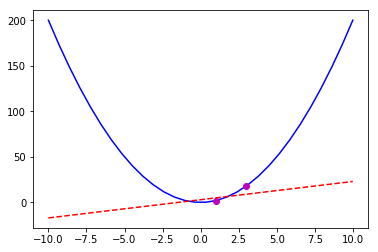

In [3]:
plt.plot(x,f(x),'b',1,f(1),'om',3,f(3),'om',x,droite(2,3,x),'--r')

**Exercice 1** : *Générer (sans copier-coller !) l’image ci-dessus.*

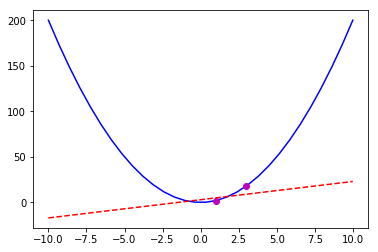

In [5]:
plt.plot(x,f(x),'b',1,f(1),'om',3,f(3),'om',x,droite(2,3,x),'--r')

Maintenant que vous êtes chauds, vous allez adapter ces instructions au problème de l’approximation de
la dérivée.

**Exercice 2**

*1. Tracer le graphe de la fonction* `fun(x) = xsin(x^2)` *sur l’intervalle $[−2,4]$ à l’aide de 150 points interpoles (on peut utiliser np.sin au lieu de math.sin car on veut l'appliquer à un tableau)*

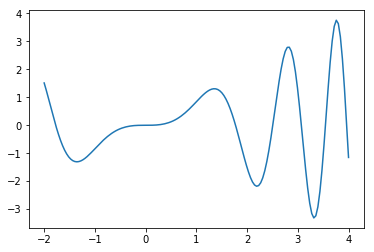

In [6]:
#puis créer les 150 valeurs que x va prendre entre -2 et +4

x = np.linspace(-2, 4, 150)

#ensuite on définit les images de ces 150 valeurs à l’aide d'une fonction f
def fun(x):
    return x*np.sin(x**2)
    
y = fun(x)

#puis l’on peut finalement créer la représentation graphique
plt.plot(x,y)

*2. Écrire une fonction* `segm_point(p,q)` *qui prend deux points $p = (p_0,p_1)$ et $q = (q_0,q_1)$ et dessine en pointillés le segment de droite les joignant.*

In [7]:
def segm_point(p,q):
    plt.plot(p[0], p[1], 'om', q[0], q[1], 'om', [p[0], q[0]], [p[1], q[1]], '--r')

*3. Tracer les deux points $p = (1.5,fun(1.5))$ et $q = (2.,fun(2.))$ et les relier par un segment en pointillés.*

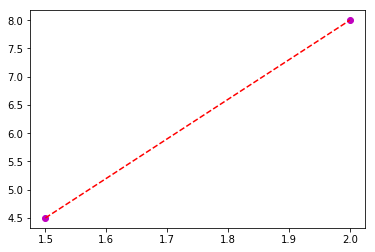

In [8]:
segm_point((1.5, f(1.5)), (2, f(2)));

*4. Écrire une fonction* `arc(f, r, eps)` *où $f$ est une fonction, a une valeur d’abscisse, eps est un pas (nombre réel petit) et qui retourne sur le graphe de $f$ l’arc joignant en pointillés le point $p = (r, f (r))$ au point $(r + eps, f (r + eps))$.*

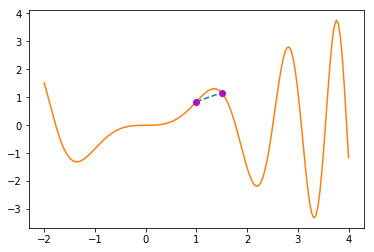

In [9]:
def arc(f, r, eps):
    plt.plot(x, y, 'C1', r, f(r), 'om', r + eps, f(r + eps), 'om', [r, r + eps], [f(r), f(r + eps)], '--')
    
arc(fun,1.,0.5)

*5. Écrire une fonction* `tan_en_a(f, a, eps, n)` *où $f$ est une fonction, a une valeur d’abscisse, $eps$ est un pas
(nombre réel petit), et n est un entier, et qui retourne sur le graphe de $f$ $n$ arcs joignant en pointillés
le point $p = (a, f (a))$ aux $n$ points $(a + \dfrac{eps}{i+1} , f(a + \dfrac{eps}{i+1} ))$ pour 0 ≤ i ≤ n-1.*

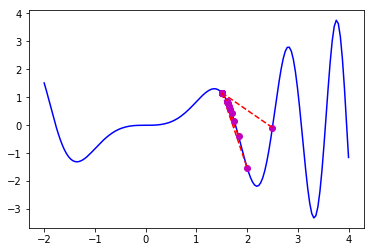

In [10]:
def tan_en_a(f, a, eps, n):
    plt.plot(x, y, 'b')
    for i in range(n):
        segm_point((a, f(a)), (a+(eps/(i+1)), f(a+(eps/(i+1)))))
    
tan_en_a(fun,1.5,1.,10)

Vous devriez, avec $a = 1.5$, $eps = 1.$, $f = fun$ obtenir cela (+ zoom) :

<img src="img/204.png">

*Pour $n$ très grand, le coefficient directeur du dernier arc ”est” la dérivée de la fonction en $a$. Nous voulons visualiser cela, donc nous allons chercher l’équation de la droite joignant le point $(a,f(a))$ au point $(a + ε, f(a + ε))$. Dans l’exemple présent, $ε = 0.01$ devrait faire l’affaire.*

**Exercice 3**:

*1. Tracer l’image qui se trouve sous la définition 1 en première page $(a = 1.4)$.*

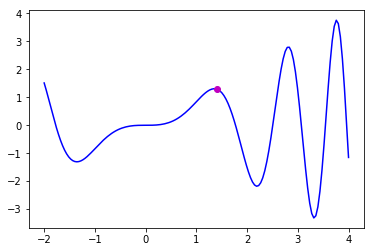

In [13]:
plt.plot(x, y, 'b', 1.4, fun(1.4), 'om--')

*2. Plus généralement, écrire une fonction* `dess_tan_en_a(a, f, x)` *qui prend en entrée une valeur réelle a, une fonction $f$, un intervalle $x$ et qui trace la tangente au graphe de $f$ au point $(a,f(a))$ sur l’intervalle $x$.*

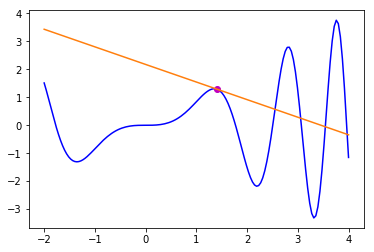

In [30]:
def dess_tan_en_a(a, f, x):
    plt.plot(x, y, 'b')
    coef = (f(a+0.01) - f(a)) / 0.01
    b = f(a) - coef * a # a*x+b = y (on a coef (a), x, y (f(x)) pas b donc b = a*x-y)
    plt.plot(a, f(a), 'om')
    plt.plot(x, droite(coef, b, x), 'C1')

dess_tan_en_a(1.4, fun, x)

# 3. La méthode du gradient

*Maintenant que nous comprenons ce qu’est une dérivée, nous pouvons mettre en place la méthode du gradient. Nous commençons dans le cas d’une variable, puis généraliserons à deux variables dans la section suivante.*

## 3.1 En une variable

*Supposons que nous partions du point d’abscisse $x = 1.5$. Doit-on aller vers la droite ou vers la gauche pour faire baisser la valeur de la fonction ? Dans un premier temps déplaçons nous à l’aide de pas de longueur fixe $ε$. Si nous devons aller vers la droite, nous devons rajouter $+ε$, c’est-à-dire aller au point $1.5+ε$. Inversement, si nous devons aller vers la gauche, nous enlevons $ε$. Visiblement, nous devons aller vers la droite. Comment faire cela de manière automatique ?*

**Exercice 4** :

*1. Écrire une fonction* `derivee(f,a)` *qui prend une fonction $f$ et un point $a$ et retourne le coefficient directeur de la tangente au graphe de $f$ au point $(a,f(a))$.*

In [12]:
def derivee(f,a):
    

*2. Choisir 4 points où la fonction est décroissante, et 4 points où la fonction est croissante, et y appliquer la fonction derivee. Quel est le signe de la dérivée en un point où la fonction est décroissante ? Où la fonction est croissante ?*

Nous suggérons donc d’automatiser le processus en se déplaçant du point $a$ au point $a_1 = a−signe(derivee(f, a))e$

**Exercice 5** : 

*1. Écrire une fonction* `un_gradient_brutal(f,a,e)` *qui prend une fonction $f$, un point $a$ et un pas $e$ et retourne le point $a_1 = a − signe(derivee(f, a))e.$*

**Indication** : *tester* `math.fabs(-6.)`et `math.fabs(2.4)`

In [13]:
import math

def un_gradient_brutal(f,a,e):
    

*2. Écrire une fonction* `gradient_brutal(f,a,e,n)` *qui prend une fonction $f$, un point $a$, un pas $e$ et un nombre $n$ d’itérations et une liste contenant les couples $(a_i,f(a_i))$ où la collection de points $a_i$ où $a_0 = a$ et $a_{i+1} = a_i − signe(derivee(f, a_i))e$.

In [14]:
def gradient_brutal(f,a,e,n):
   

*3. Essayer cette fonction avec $f = fun$, $a = 1.5$, $ε = 0.5$ et $n = 5$. Faire une représentation graphique. Combien de points apparaissent sur le graphique ? Combien vous attendiez vous à voir ? Comment expliquer la différence ?*

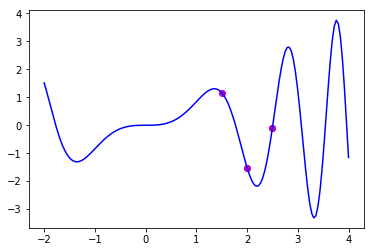

L’idée pour éviter cela est de prendre la pente en compte : si la pente $derivee(f, a)$ est très forte, on fait un grand pas $derivee(f,a)ε$. Par contre lorsque la pente est très faible, on fait un petit pas $derivee(f,a)ε$.

**Exercice 6** : 

*1. Écrire une fonction* `gradient(f,a,e,n)` *qui prend une fonction $f$, un point $a$, un pas $e$ et un nombre $n$ d’itérations et retourne une liste contenant les couples $(a_i,f(a_i))$ où la collection de points $a_i$ où $a_0 = a$ et $a_{i+1} = a_i − derivee(f, a_i)*e$.*

In [16]:
def gradient(f,a,e,n):
   

*2. Essayer cette fonction avec $f = fun$, $a = 1.5$, $ε = 0.5$ et $n = 5$. Faire une représentation graphique. Cela fonctionne-t’il mieux ?*

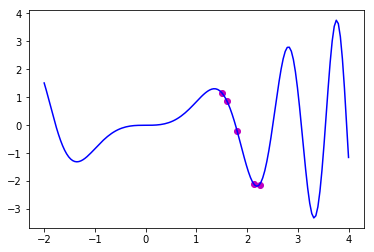

Nous sommes presque arrivés au point où l’on peut appliquer la méthode du gradient au problème de la régression linéaire. Cependant il reste encore une étape à franchir : nous venons d’apprendre comment trouver le minimum d’une fonction d’une variable. Or, dans le problème de la regression linéaire, il y’a deux paramètres à optimiser car trouver la droite qui minimise la fonctionnelle d’action revient à identifier les deux paramètres $a$ et $b$, i.e. la pente de la droite et l’ordonnée à l’origine qui minimisent cette fonctionnelle. La solution du problème général fera l’objet du prochain TP où l’on étendra la méthode du gradient pour des fonctions de plusieurs variables, grâce à l’introduction des dérivées partielles. Pour le moment étudions le cas restreint où l’on suppose que le paramètre $b$ est fixé à $0$.

## 3.2 Application à la régression linéaire ”restreinte”

On considère le nuage de points

In [18]:
nu = [[0.03, 0.44], [1.87, 4.18], [-0.71, -1.65], [-0.72, -0.86]]

**Exercice 7** : *En s’inspirant de l’exercice 13 du TP sur la regression linéaire, écrire une fonction* `actionbf ixe(nuage, a)` *qui prend un nuage de points $nuage = ((x_1, y_1), . . . , (x_n, y_n))$, un coefficient $a$ d’une droite d’équation $y = ax$ et affiche l’action au point $a$ i.e. la somme sur les points de nuage des tensions de ces points.*

In [19]:
def actionbfixe(nuage,a):
   

4.0878


**Exercice 8** : *Résoudre l’exercice précédent en écrivant une fonction actionfixeb(nuage,a) qui prend les
mêmes argument et retourne action(nuage, a, 0)*

On veut maintenant fixer nu et appliquer la méthode du gradient à la fonction d’action.

**Exercice 9** : *Définir une fonction de $a$ par f(a) = actionbfixe(nu,a) puis lui appliquer l’algorithme du gradient.*

In [20]:
def fonction(a):
    
r = gradient(fonction,0.5,0.01,10)

Plus généralement, nous souhaitons automatiser cela.

**Exercice 10** :  *Combiner les fonctions vues dans ce TP afin d’écrire une fonction* `mingrad(nu,a0,n)` *qui prend un nuage de points $nuage = ((x_1, y_1), . . . , (x_m, y_m))$, qui applique la méthode de gradient en partant de a0 et avec n étapes et retourne une droite passant par l’origine approchant au mieux le nuage (par application de la méthode du gradient) et trace le nuage de points ainsi que la droite.*

**Remarque** : *Vous pouvez afficher les droites correspondantes à chaque valeur $a_n$ de la méthode de gradient avec des couleurs différentes (voir exercices bonus du TP1)* 

In [50]:
def mingrad(nuage,a0,n):
   

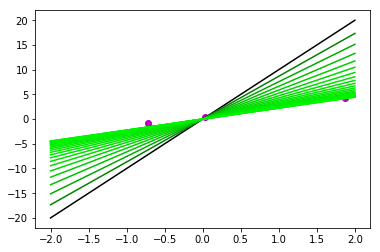

In [51]:
mingrad(nu,10.,100)

# 4. Bonus

## 4.1 Générer des figures de régression

L’objet de cette partie est de générer les figures du TP précédent. La première des choses à faire est de créer des nuages de points qui sont à peu près linéaires. L’idée est de d’abord générer des points sur une droite, puis de les perturber. Mais auparavant, il va falloir tirer aléatoirement les abscisses du nuage de points.

**Exercice 11** : *Écrire une fonction* `abscissenuage(n, c, ec)` *qui tire un ensemble de $n$ valeurs selon une distribution Gaussienne centrée en c et d’écart-type ec.*

In [22]:
import random

def abscissenuage(n, c, ec):
    

**Exercice 12** : *Écrire une fonction* `nuagedroite(nux, a, b)` *qui prend un nuage d’abscisses nux, des coefficients directeurs de droite $a$ et $b$ (pente et ordonnée à l’origine) et retourne les points sur la droite correspondant.*

In [23]:
def nuagedroite(nux,a,b):
    

**Exercice 13** : *Écrire une fonction* `perturbe(nu, e, ec)` *qui prend un nuage de points nu et perturbe l’ordonnée de chacun des points en lui ajoutant une perturbation qui suit une une distribution Gaussienne centrée en c et d’écart-type ec.*

In [24]:
def perturbe(nu, c, ec):
    

**Exercice 14** : *Écrire une fonction* `nuagelineaire(n,a,b)` *qui prend un entier $n$ et retourne nuage $nu$ de $n$ points autour de la droite d’équation $ax + b$, puis trace un graphique représentant la droite et le nuage de points.*

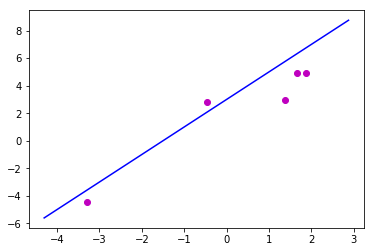

In [25]:
def nuagelineaire(n,a,b):
   

**Exercice 15** : *Écrire une fonction droite2points(p,q) qui prend deux points $p$ et $q$ et trace un graphique représentant les deux points et la droite les joignant.*

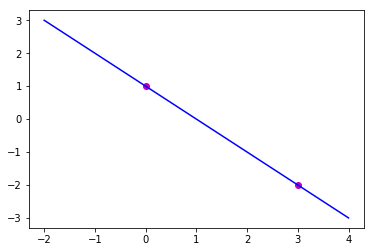

In [26]:
def droite2points(p,q):
    

## 4.2 Amélioration de la méthode de gradient

Vous ne l'avez peut être pas remarqué, mais le pas $e$ dans la méthode de gradient est important. En effet, avec un pas trop petit vous convergerez difficilement vers le minimum. Par exemple : 

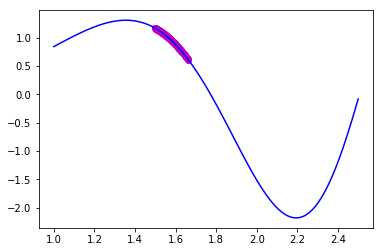

In [27]:
t = gradient(fun,1.5,0.0005,100)



Mais un pas trop grand peut avoir des conséquences désastreuses, en effet vous pourriez louper le minimum de la fonction et rebondir un peu partout sur le graphe (c'est d'ailleurs un peu ce qu'il se passe dans "gradient brutal"). Par exemple :

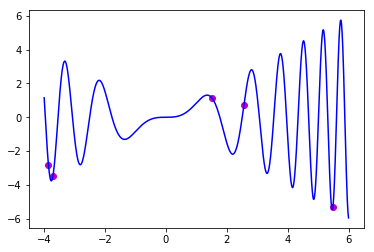

In [28]:
t = gradient(fun,1.5,0.5,5)



Voici une courte vidéo (en anglais) expliquant ce que l'on vient de raconter. https://youtu.be/TwJ8aSZoh2U

Il y a aussi une autre méthode pour palier à ce genre de problème, la méthode de gradient avec moment. Voici une courte vidéo explicative : https://youtu.be/r-rYz_PEWC8

**Exercice 16** : *Implémenter la fonction* `gradient_avec_moment(f,a,e,b,n)` *puis* `mingrad_avec_moment(nu,n)`.

**Indication** : *On peut définir le 'i-ème moment' d'une fonction f en un point $x$ comme ceci :*
$$
    M_{i+1}= b*M_i + e*derivee(f,x)
$$

In [29]:
def gradient_avec_moment(f,a,e,b,n):
    

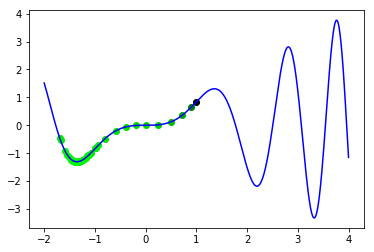

In [30]:
c = gradient_avec_moment(fun,1,0.05,0.9,100)



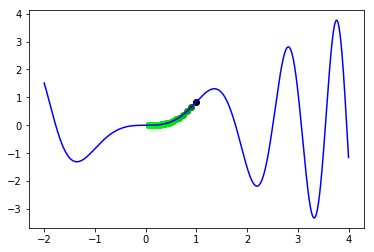

In [31]:
c = gradient(fun,1,0.05,100)

